<a href="https://colab.research.google.com/github/ilante/AML_91934_exam/blob/main/AML_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First Machine Learning Project

## Fashion-MNIST 

### International Master of Bioinformatics, University of Bologna

#### Immanuela Antigone Engländer


# 1. Background

The dataset is taken from Zalando's article images with a considerable size of 60 000 samples and a test set of 10 000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes. The Fashion-MNIST serves as a variant of original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

I choose it to be sure that I don't have the same project as my fellow students.

Here an example of how the data looks like

![](https://raw.githubusercontent.com/ilante/AML_91934_exam/main/fashion-mnist-example-img.png)

The authors of Fashion-MNIST argue that it may replace the original MNIST. So far the original has been used as a benchmark. But they argue that the original may be to simple. Reasons to choose Fashion-MNIST over the original are:

* **MNIST is too easy**. Convolutional nets can achieve 99.7% on MNIST. Classic machine learning algorithms can also achieve 97% easily. Check out our side-by-side benchmark for Fashion-MNIST vs. MNIST, and read "Most pairs of MNIST digits can be distinguished pretty well by just one pixel."

* **MNIST is overused.** In [this April 2017 Twitter thread](https://twitter.com/goodfellow_ian/status/852591106655043584), Google Brain research scientist and deep learning expert Ian Goodfellow calls for people to move away from MNIST.
* **MNIST can not represent modern CV tasks**, as noted in [this April 2017 Twitter thread](https://twitter.com/fchollet/status/852594987527045120), deep learning expert/Keras author François Chollet.


## Reference of Fashion-MNIST:

https://arxiv.org/abs/1708.07747 

Here the abstract;

![](https://raw.githubusercontent.com/ilante/AML_91934_exam/main/citation.png)

# 2. Importing the Required Libraries

In [4]:
# !pip install -q colabcode
# from colabcode import ColabCode

# Loading module to monitor time:
!pip install ipython-autotime
%load_ext autotime



time: 183 µs (started: 2021-12-06 10:38:42 +00:00)


Libraries:

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # loading seaborns default theme

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import sklearn



time: 2.7 ms (started: 2021-12-06 12:01:14 +00:00)


We import the Fashion-MNIST set from keras in an already vectorized numpy format:

In [56]:
f_mnist = keras.datasets.fashion_mnist

# x, y for each tuple:
(train_images, train_labels), (test_images, test_labels) = f_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

time: 487 ms (started: 2021-12-06 13:15:44 +00:00)


The images inside f_minst are black and white and you get a value between 0 and 255. Where black is 0.

In [57]:
for i in range(len(class_names)):
  print(str(i)+'. ', class_names[i])

0.  T-shirt/top
1.  Trouser
2.  Pullover
3.  Dress
4.  Coat
5.  Sandal
6.  Shirt
7.  Sneaker
8.  Bag
9.  Ankle boot
time: 7.81 ms (started: 2021-12-06 13:15:52 +00:00)


The data set contains 10 different classes: 

1.  T-shirt/top
1.  Trouser
2.  Pullover
3.  Dress
4.  Coat
5.  Sandal
6.  Shirt
7.  Sneaker
8.  Bag
9.  Ankle boot



# 2.1 Exploring the Data

Lets see how many samples we got;

In [10]:
# inspect train_images
print('train_images: ', train_images.shape)
# n of labels:
print('n of train_labels: ', len(train_labels))
print('\n')
# inspect test_images
print('test_images: ', test_images.shape)
# n of labels in test set
print('n labels in test_images: ', len(test_labels))

train_images:  (60000, 28, 28)
n of train_labels:  60000


test_images:  (10000, 28, 28)
n labels in test_images:  10000
time: 6.69 ms (started: 2021-12-06 10:50:25 +00:00)


# 2.2 Preprocessing and Reshaping the Data

By inspecting an original image we can see that it is scaled in the range [0, 255] but we prefer to have a scaling from [0, 1] &rarr; thus we have to divide each pixel value by **255**.

Below an image of a pullover item 707 from the training set.



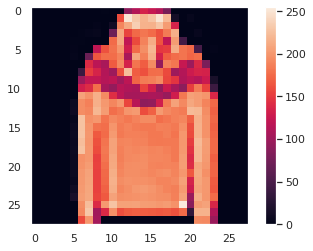

time: 422 ms (started: 2021-12-06 13:23:12 +00:00)


In [76]:
plt.figure()
plt.imshow(train_images[707])
plt.colorbar()
plt.grid(False)

We convert **both** training AND testing set to scale from [0, 1]:

In [103]:
train_images = train_images/255.0
test_images = test_images/255.0

time: 83.9 ms (started: 2021-12-06 15:45:35 +00:00)


# 2.3 Example images from both training - and testing set:

Here  9 examples from the training set:


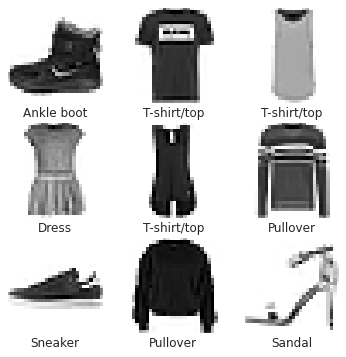

time: 441 ms (started: 2021-12-06 13:39:21 +00:00)


In [77]:
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Here nine sample images of the testing set:

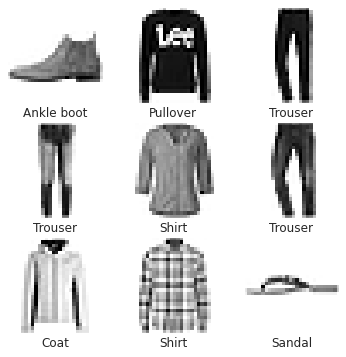

time: 461 ms (started: 2021-12-06 13:40:21 +00:00)


In [78]:
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[test_labels[i]])
plt.show()

## 2.4 Visualizing the distribution of classes within training and testing set:

It is crucial to inspect the distribution of classes, as a skewed data set is prone to overfitting and not able to generate a model that is able to **generalize for unseen data**. We decided to do a count plot as it is a good way to visualize the distribution of classes. The first figure shows the distribution of the 9 classes of the training set, while the second figure shows the distribution of the testing set. We can appreciate that both sets are balanced.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'count'), Text(0.5, 0, 'classes')]

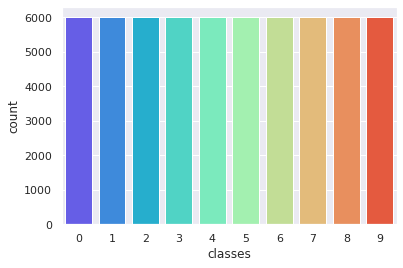

time: 251 ms (started: 2021-12-06 11:12:44 +00:00)


In [26]:
# Plotting dist. training set:
count_plt = sns.countplot(train_labels,palette="rainbow")
count_plt.set(xlabel='classes', ylabel='count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'count'), Text(0.5, 0, 'classes')]

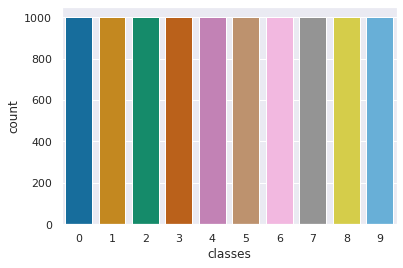

time: 321 ms (started: 2021-12-06 11:13:35 +00:00)


In [27]:
# Plotting dist. testing set:
count_plt = sns.countplot(test_labels,palette="colorblind")
count_plt.set(xlabel='classes', ylabel='count')

# 3. Building a Model using Neural Networks

Aka as Artificial Neural Networks (ANN) are a subeset of ML methods that are at the core of deep learning algorithms. Their structure was inspired by the biological neurons of the brain which coined their name Neural Networks (NN).

NNs are made of a node layers that contain an input layer, one or more hidden layers and an output layer. Each artificial neuron connects to another and has an associated threashold and and associated weight.

To build the NN we have to configure the layers of the model before compiling it.

## 3.1 Setting up the Layers of the NN

The layers are the basic building blocks of an NN and extract the representations from the given data. Most of deep learning consists of chaining together these layers. Layers as `tf.keras.layres.Dense` have apramenters that are learned during the training. 

For our training we will use the Rectified Linear Unit (ReLU). It is a simple calculation that returns the value provided as input directly, or the value 0.0 if the input is 0.0 **or less** [see](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).

Here and image of the ReLU:

![](https://s2.qwant.com/thumbr/474x351/f/e/354d8f54c966180968777154786e5562a78953d12002e5e24010e54e3cfcf1/th.jpg?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.FZ3MiYnlLaNu6igVodW4LQHaFf%26pid%3DApi&q=0&b=1&p=0&a=0)



`tf.keras.layers.Flatten`; transforms the format of the images from a 2-dimensional array
(of 28 * 28 = 748 pixles) to a one dimensional array holding 784 pixels
This layer basically is 'unstacking' the rows of pixles in the image and lining them up.
This layer does NOT have to learn any parameters; it only reformats the data.

In [80]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


time: 366 ms (started: 2021-12-06 14:17:24 +00:00)


After flattening the pixels, the network is composed of a sequence of two `tf.keras.layers.Dense` layers. They are densely connected, or fully connected neural layers. The first layer has 128 neurons. The last layer returns a logits array of lenght 10. Each neuron will contain a score for the current image corresponding to the classes.

## 3.2 Compiling the Model

To get the model ready for training it needs some more settings. We add them during the model's **compile** step.

* We need to set a **loss function** (aka error function). It measures how accurate the model is during the training. Obviously we want to minimize this function to minimize the error and 'steer' the model into the right direction.
* We need an **optimizer** which defines how the model is updated based on the data that it is given and depending on the **loss function**. Here we use an optimizer that implements the Adam algorithm.
* Metrics are used for monitoring training and testing steps. Here we use accuracy = the fraction of images that are correctly classified.



In [81]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


time: 16.5 ms (started: 2021-12-06 14:50:49 +00:00)


## 3.3 Training the Model

The training of a nn model requires 4 steps:

1. Feeding the training data to the model. The training data here is held by the two arrays; `train_images` and `train_labels`

2. The model has to learn the associated images and labels

3. Testing the model by making predictions on an independent test set &rarr; `test_images` array

4. Verifying that the predictions made actually match the labels by comparing the predicted lables to the `test_labels` array

## 3.1.1 Feeding the Model

To initiate training we call the `model.fit` method. The name is very descriptive. As it fits the model to the training data.

In [83]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4723 - accuracy: 0.8407
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4631 - accuracy: 0.8443
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4524 - accuracy: 0.8457
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4558 - accuracy: 0.8471
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4481 - accuracy: 0.8486
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4569 - accuracy: 0.8477
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4414 - accuracy: 0.8497
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4495 - accuracy: 0.8499
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4371 - accuracy: 0.8525
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.438

time: 1min 21s (started: 2021-12-06 15:00:52 +00:00)


We can see how the model trains and in the starndard output above we see accuracy in output for each epoch. Our model reaches an accuracy of ~ 0.85 = 85% of the images are correctly classified.

## 3.1.2 Evaluating the Accuracy on our Testing set

In [84]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.6092 - accuracy: 0.8245 - 511ms/epoch - 2ms/step

Test accuracy: 0.8245000243186951
time: 811 ms (started: 2021-12-06 15:03:25 +00:00)


We can see that the accuracy was slightly lower with only ~ 82% of images correctly classified. The difference between the training and testing accuracy can be explained by *overfitting*. So we know that the model has 'memorized' the noise and details in the training dataset this leads to the slightly lower performance on the testing set (or any new unseen data).

We can mitigate overfitting by:

* Getting more training data
* Reducing the capacity of the network
* Adding weight regularization
* Adding dropout
* Data augmentation
* Batch normalization

Usually it is best to combine the above methods.

As the goal for this project is to show several methods, we wil however continue with the model as is.


## 3.1.3 Testing the Model by Making Predictions on an Independent Test Set 

The independent testing set is our `test_images` array. Logits is the vector of raw (non-normalized) predicitons that a classification model generates. It is then passed to a normalization function, in our case the `softmax` function. The `softmax` function generates a vector of normalized probabilities with one value for each possible class. These probabilities are easy to interpret.

In [86]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


time: 483 ms (started: 2021-12-06 15:17:27 +00:00)


Now the model has predicted the label of **each** image in the **testing_set**. Below we are inspecting the first prediction:

In [88]:
print(predictions[0])
print(len(predictions[0]))

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 3.8815838e-01 0.0000000e+00 3.1485010e-02 4.0223492e-36 5.8035660e-01]
10
time: 3.59 ms (started: 2021-12-06 15:19:17 +00:00)


We can appreciate that each prediciton is an array of 10 numbers, which represent the models confidence that the image corresponds to each of the 10 different classes (labels of clothing). The label with the highest confidence is the class called for the item.

In [93]:
print(np.argmax(predictions[0]))

print('\n') # forcing autotime to print into next line


9


time: 4.36 ms (started: 2021-12-06 15:24:31 +00:00)


In [94]:
class_names[9]

'Ankle boot'

time: 3.58 ms (started: 2021-12-06 15:26:14 +00:00)


We now know that the model is most confident that the class of that the image is an ankle boot. To find out weather this call was correct we can examine the `test_labels`:

In [95]:
test_labels[0] # dunno why time module is printed right after 9

9

time: 5.25 ms (started: 2021-12-06 15:27:57 +00:00)


## 3.1.4 Verifying predictions

First we write functions to visualize the full set of 10 class predictions.

Then we make predictions about some images using the trained model.



In [98]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')


time: 19.8 ms (started: 2021-12-06 15:36:18 +00:00)


As you can see in the function above: correctly classified images are labelled green while wrongly classified ones are red.

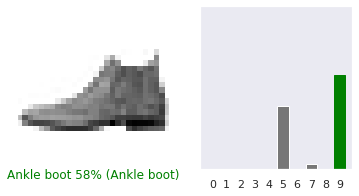

time: 202 ms (started: 2021-12-06 15:36:30 +00:00)


In [99]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


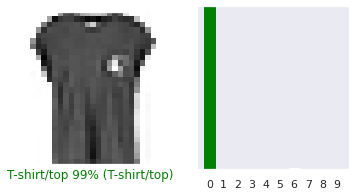

time: 203 ms (started: 2021-12-06 15:37:27 +00:00)


In [100]:
i = 113
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


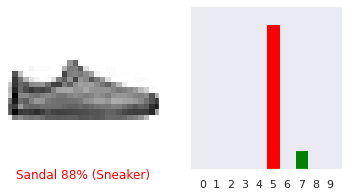

time: 213 ms (started: 2021-12-06 15:37:57 +00:00)


In [101]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


Below we are lotting several images including their predictions in a grid: We can see that the model can be wrong (red) even if it is very confident.

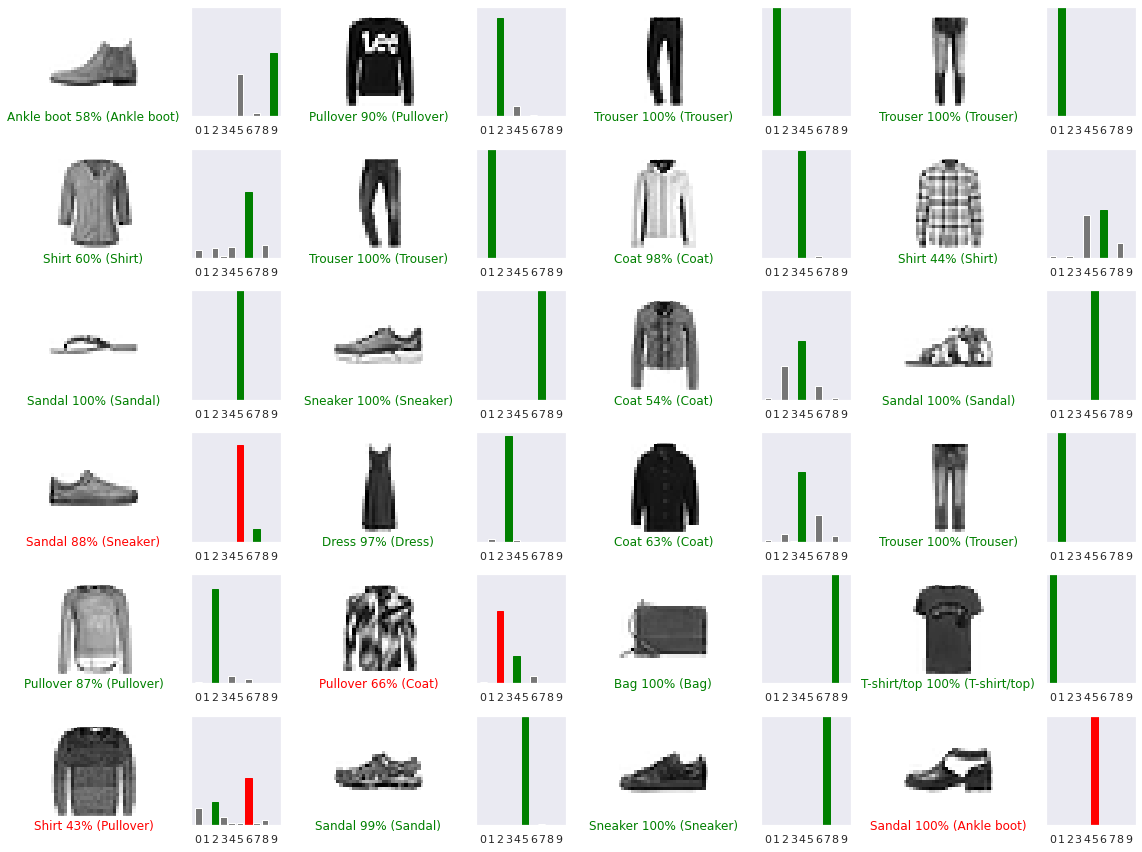

time: 5.63 s (started: 2021-12-06 15:40:09 +00:00)


In [102]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# 3. Generating a Decision Tree

A supervised learning model that can be used to solve classification as well as regression problems. It uses a tree-like model of decisions and their possible concequences to solve the problem. Each internal node represents an attribute and each leaf node represents a class label [see](https://en.wikipedia.org/wiki/Decision_tree).